**Juanita Correa Amador**

# **Modelamiento del riesgo derivado de las operaciones del negocio de una FINTECH**

En este estudio, una FINTECH busca estimar las pérdidas asociadas a los fallos tecnológicos en sus canales electrónicos —por ejemplo, errores en transacciones, caídas del sistema o problemas en la app—.

Estos fallos no solo afectan la experiencia del cliente, sino también los ingresos y la reputación de la empresa. Por eso, contar con un modelo de riesgo operacional permite anticipar pérdidas, mejorar la gestión de incidentes y definir políticas de mitigación efectivas.



---

**Caracterización del riesgo y construcción del modelo**

Para analizar este riesgo, se trabajó con una base de datos que registra **transacciones diarias, valores transados, transacciones fallidas y el valor promedio generado.**

A partir de esta información se modelaron dos variables clave:

* **Frecuencia:** número de transacciones fallidas (qué tan seguido ocurren los fallos).

* **Severidad:** valor promedio de las transacciones afectadas (qué tan graves son las consecuencias).

Ambas variables se agruparon mediante el modelo K-Medoids, lo que permitió clasificarlas en cinco niveles lingüísticos que representan distintos grados de riesgo.

* Para la **frecuencia**, los niveles fueron: Muy Pocos (1.75), Pocos (4.00), Algunos (7.00), Muchos (11.50) y Bastantes (16.00).

* Para la **severidad**, los niveles fueron: Muy Bajo (0.95), Bajo (3.53), Medio (6.98), Alto (12.14) y Crítico (17.31).

Esta clasificación permite traducir datos numéricos en categorías comprensibles que facilitan la toma de decisiones gerenciales.

**Nivel de gestión**

| Nivel | Descripción                                                                                | Costo (KUSD) | Desviación |
| ----- | ------------------------------------------------------------------------------------------ | ------------ | ---------- |
| 1     | Bajo – capacitación básica, seguimiento de incidencias.                                    | 0.0122       | 0.0057     |
| 2     | Medio – gestión de configuración, automatización, capacitación en resolución de problemas. | 0.0374       | 0.0275     |
| 3     | Moderado – pruebas de carga, detección de anomalías, análisis de riesgos.                  | 0.1731       | 0.0856     |
| 4     | Alto – monitoreo en tiempo real, detección de intrusos, auditorías, CSIRT.                 | 0.4080       | 0.0386     |
| 5     | Crítico – recuperación de desastres, blockchain, centros redundantes.                      | 0.6283       | 0.0760     |


**Nivel de impacto**

| Nivel | Descripción                                                      | Impacto en operación  | Impacto cliente             | Impacto financiero                         | Frecuencia |
| ----- | ---------------------------------------------------------------- | --------------------- | --------------------------- | ------------------------------------------ | ---------- |
| 1     | Bajo – errores visuales o leves.                                 | Mínima afectación.    | Molestia temporal.          | Cientos a miles USD.                       | Muy alta   |
| 2     | Medio – fallos menores de interfaz o rendimiento.                | Disminución limitada. | Disminución satisfacción.   | Miles a decenas de miles.                  | Alta       |
| 3     | Alto – interrupción temporal o pérdida parcial de datos.         | Disminuye eficiencia. | Pérdida productividad.      | Decenas de millones a cientos de millones. | Media      |
| 4     | Crítico – interrupción prolongada, vulnerabilidades graves.      | Disminución drástica. | Insatisfacción masiva.      | Cientos de millones a miles de millones.   | Baja       |
| 5     | Catastrófico – caída total del sistema, pérdida de datos masiva. | Paraliza operaciones. | Pérdida total de confianza. | Millones a miles de millones.              | Muy baja   |


## **Carga de las librerias de trabajo**

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Crear clusters para las variables de entrada**

In [12]:
def KMedoids(X, tipo="impacto"):

    X = np.array(X).astype(float)
    n_niveles = 5
    XC = np.zeros((n_niveles, 1))

    # Definir centroides según tipo
    if tipo == "impacto":
        # Rangos proporcionales según niveles 1–5 de la tabla de impacto
        pesos = np.array([0.05, 0.20, 0.40, 0.70, 1.00])
    else:  # tipo == "gestion"
        # Niveles de madurez de gestión (creciente en costo y sofisticación)
        pesos = np.array([0.10, 0.25, 0.50, 0.75, 1.00])

    # Escalar los centroides en función del rango real de la variable
    minimo, maximo = np.min(X), np.max(X)
    XC[:, 0] = minimo + pesos * (maximo - minimo)

    # Cálculo de sigma
    sigma = np.zeros((n_niveles, 1))
    for k in range(n_niveles):
        diferencias = np.abs(X - XC[k, 0])
        sigma[k, 0] = np.mean(diferencias)

    return XC, sigma

## **Carga de los datos**

In [15]:
# Cargar base de datos desde Google Drive
nxl = '/content/drive/MyDrive/Semestre 8/Integración/P2/data_p2.xlsx'
XDB = pd.read_excel(nxl, header=1)
XDB.head()


,Fechas,Transacciones Diarias,Valor Transado (millones),Transacciones Fallidas,Valor Generado Promedio (Millones),Descripción Evento
0,2009-01-01,80,14.8058,1,0.5374,"Errores visuales menores, problemas de usabili..."
1,2009-01-02,105,56.4721,4,1.1978,"Errores en la interfaz de usuario, fallas en f..."
2,2009-01-03,70,9.9760,5,0.4269,"Errores visuales menores, problemas de usabili..."
3,2009-01-04,105,18.2949,6,1.0814,"Errores en la interfaz de usuario, fallas en f..."
4,2009-01-05,130,23.4112,7,1.2105,"Errores en la interfaz de usuario, fallas en f..."


In [18]:
XDB.columns

Index(['Fechas', 'Transacciones Diarias', 'Valor Transado (millones)',
       'Transacciones Fallidas', 'Valor Generado Promedio (Millones)',
       'Descripción Evento'],
      dtype='object')

## **Frecuencia, severidad, mapa de pérdida, matriz de impacto**

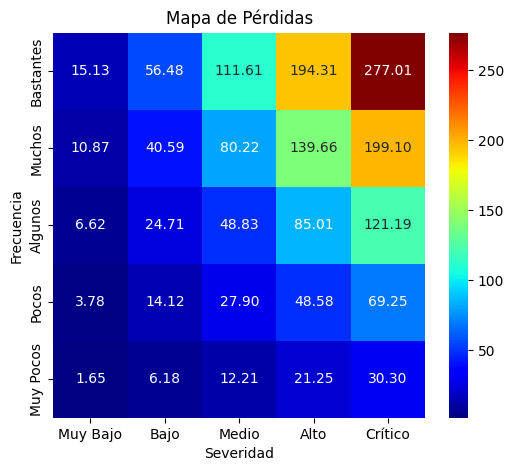

Clústeres para la Frecuencia:
['Muy Pocos', 'Pocos', 'Algunos', 'Muchos', 'Bastantes']
[[ 1.75  4.    7.   11.5  16.  ]]
Clústeres para la Severidad:
['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Crítico']
[[ 0.945635  3.52994   6.97568  12.14429  17.3129  ]]


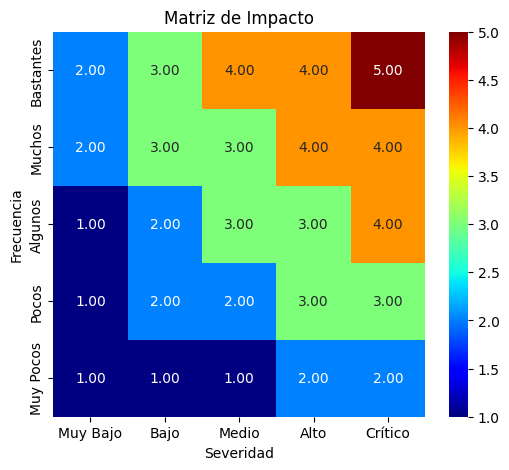

,Frecuencia (Transacciones Fallidas),ClusterFrecuencia,Severidad (Valor Generado Promedio - Millones),ClusterSeveridad,Impacto (Frecuencia x Severidad)
0,1.0,0.0,0.5374,0.0,0.5374
1,4.0,1.0,1.1978,0.0,4.7912
2,5.0,1.0,0.4269,0.0,2.1345
3,6.0,2.0,1.0814,0.0,6.4884
4,7.0,2.0,1.2105,0.0,8.4735
...,...,...,...,...,...
696,1.0,0.0,0.5747,0.0,0.5747
697,6.0,2.0,0.7209,0.0,4.3254
698,10.0,3.0,0.3628,0.0,3.6280
699,4.0,1.0,0.2715,0.0,1.0860


In [19]:
np.random.seed(42)

# Frecuencia: Transacciones Fallidas
Xf = np.array(XDB['Transacciones Fallidas'])
XCf, sigmaf = KMedoids(Xf, tipo="impacto")
lbf = ['Muy Pocos', 'Pocos', 'Algunos', 'Muchos', 'Bastantes']

# Severidad: Valor Generado Promedio (Millones)
Xs = np.array(XDB['Valor Generado Promedio (Millones)'])
XCs, sigmas = KMedoids(Xs, tipo="impacto")
lbs = ['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Crítico']

# Mapa de pérdidas (Frecuencia vs Severidad)
MP = np.outer(XCf, XCs)
MPo = MP[::-1, :]  # Reorganizado para graficar correctamente

plt.figure(figsize=(6,5))
sns.heatmap(MPo, annot=True, cmap='jet', fmt='.2f')
plt.xlabel('Severidad')
plt.xticks(np.arange(len(lbs)) + 0.5, lbs)
plt.ylabel('Frecuencia')
plt.yticks(np.arange(len(lbf)) + 0.5, lbf[::-1])
plt.title('Mapa de Pérdidas')
plt.show()

# Mostrar resultados de los clústeres
print('Clústeres para la Frecuencia:')
print(lbf)
print(XCf.transpose())
print('Clústeres para la Severidad:')
print(lbs)
print(XCs.transpose())

# Matriz de Impacto
MI = np.array([
    [1, 1, 1, 2, 2],
    [1, 2, 2, 3, 3],
    [1, 2, 3, 3, 4],
    [2, 3, 3, 4, 4],
    [2, 3, 4, 4, 5]
])
MIo = MI[::-1, :]

plt.figure(figsize=(6,5))
sns.heatmap(MIo, annot=True, cmap='jet', fmt='.2f')
plt.xlabel('Severidad')
plt.xticks(np.arange(len(lbs)) + 0.5, lbs)
plt.ylabel('Frecuencia')
plt.yticks(np.arange(len(lbf)) + 0.5, lbf[::-1])
plt.title('Matriz de Impacto')
plt.show()

# Clasificación de los registros
ncf = np.zeros((len(Xf), 1))  # clúster asignado en frecuencia
ncs = np.zeros((len(Xs), 1))  # clúster asignado en severidad

for k in range(len(Xf)):
    ncf[k] = np.argmin(np.abs(XCf - Xf[k]))
    ncs[k] = np.argmin(np.abs(XCs - Xs[k]))

# Tabla consolidada con resultados
tabla = np.column_stack((Xf, ncf, Xs, ncs, Xf * Xs))
df = pd.DataFrame(tabla, columns=[
    "Frecuencia (Transacciones Fallidas)",
    "ClusterFrecuencia",
    "Severidad (Valor Generado Promedio - Millones)",
    "ClusterSeveridad",
    "Impacto (Frecuencia x Severidad)"
])
display(df)


## **Distribución agregada de las perdidas**

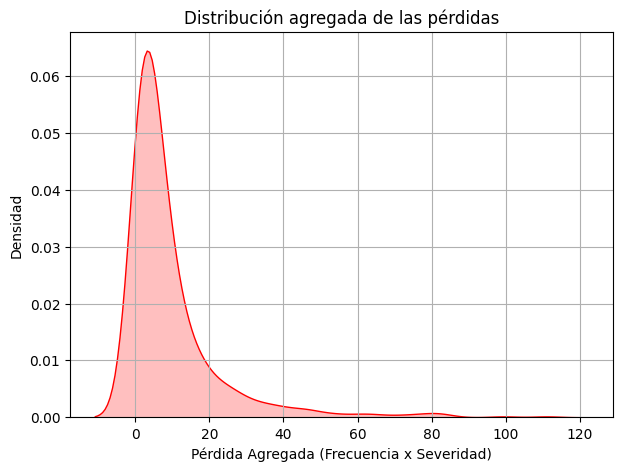

El costo estimado de la póliza de aseguramiento es:
102,902.10 unidades monetarias


,Media,Desviación,Asimetría,OpVar,NPE,NPNE,NPC
0,9.451113,13.707472,3.34836,102.9021,502.0,198.0,1.0


In [21]:
# Variables base
Xf = np.array(XDB['Transacciones Fallidas'])                 # Frecuencia
Xs = np.array(XDB['Valor Generado Promedio (Millones)'])    # Severidad

# Cálculo de pérdidas agregadas
LDA = Xf * Xs

# Visualización de la distribución
plt.figure(figsize=(7,5))
sns.kdeplot(LDA, fill=True, color='red')
plt.xlabel('Pérdida Agregada (Frecuencia x Severidad)')
plt.ylabel('Densidad')
plt.title('Distribución agregada de las pérdidas')
plt.grid(True)
plt.show()

# Cálculo de parámetros estadísticos del riesgo
pr = []

# Parámetros básicos
media = np.mean(LDA)
desv = np.std(LDA)
asim = skew(LDA)

pr.extend([media, desv, asim])

# Pérdidas esperadas
NPE = len(LDA[LDA < media])

# Percentil de riesgo extremo
OpVar = np.percentile(LDA, 99.9)
pr.append(OpVar)

print("El costo estimado de la póliza de aseguramiento es:")
print(f"{OpVar * 1000:,.2f} unidades monetarias")

# Pérdidas no esperadas y catastróficas
NPC = len(LDA[LDA > OpVar])
NPNE = len(LDA) - NPE - NPC

pr.extend([NPE, NPNE, NPC])

# DataFrame con resultados
pr = np.array(pr).reshape(1, 7)
df_riesgo = pd.DataFrame(
    pr,
    columns=["Media", "Desviación", "Asimetría", "OpVar", "NPE", "NPNE", "NPC"]
)

display(df_riesgo)

| Métrica        | Descripción                                                                     |
| -------------- | ------------------------------------------------------------------------------- |
| **Media**      | Pérdida promedio esperada.                                                      |
| **Desviación** | Volatilidad del riesgo (cuánto varía).                                          |
| **Asimetría**  | Mide si hay más pérdidas extremas hacia un lado (cola derecha = eventos raros). |
| **OpVar**      | Valor en riesgo operacional al 99.9%, es decir, el peor escenario esperable.    |
| **NPE**        | Número de pérdidas esperadas (por debajo de la media).                          |
| **NPNE**       | Número de pérdidas no esperadas (alrededor de la media).                        |
| **NPC**        | Número de pérdidas catastróficas (superiores al OpVar).                         |


## **Número de eventos de pérdida por celda de la matriz**

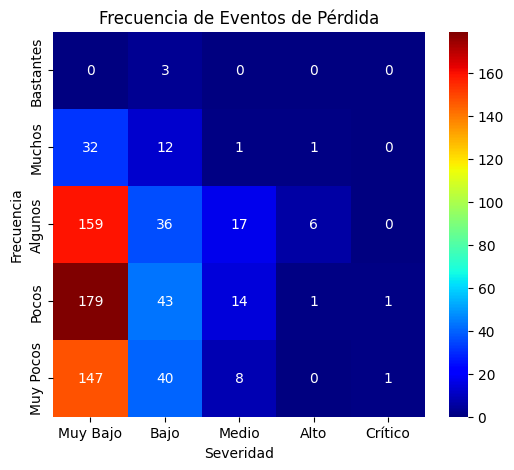

In [22]:
Mf = np.zeros((5, 5))

# Extraer variables base
XDf = np.array(XDB['Transacciones Fallidas'])                # Frecuencia
XDs = np.array(XDB['Valor Generado Promedio (Millones)'])   # Severidad

# Contar eventos por celda según proximidad a los centroides
for k in range(len(XDf)):
    nff = np.argmin(np.abs(XCf[:, 0] - XDf[k]))  # cluster frecuencia
    nfs = np.argmin(np.abs(XCs[:, 0] - XDs[k]))  # cluster severidad
    Mf[nff, nfs] += 1

# Reordenar matriz para visualización
Mfo = Mf[::-1, :]

# Visualizar heatmap de frecuencia de eventos
plt.figure(figsize=(6, 5))
sns.heatmap(Mfo, annot=True, cmap='jet', fmt='.0f')
plt.xlabel('Severidad')
plt.xticks(np.arange(len(lbs)) + 0.5, lbs)
plt.ylabel('Frecuencia')
plt.yticks(np.arange(len(lbf)) + 0.5, lbf[::-1])  # mostrar etiquetas invertidas
plt.title('Frecuencia de Eventos de Pérdida')
plt.show()

## **Celdas 2 y 3**

In [25]:

# Convertir los clusters a enteros para fácil filtrado
df["ClusterFrecuencia"] = df["ClusterFrecuencia"].astype(int)
df["ClusterSeveridad"] = df["ClusterSeveridad"].astype(int)

# Filtrar registros ubicados en las celdas 2 y 3
celda_23 = df[(df["ClusterFrecuencia"] == 2) & (df["ClusterSeveridad"] == 3)]

# Verificar cuántos eventos hay en esa celda
print(f"Número de eventos en las celdas 2 y 3: {len(celda_23)}")

# Calcular estadísticas de impacto en esa celda
impacto_total = celda_23["Impacto (Frecuencia x Severidad)"].sum()
impacto_promedio = celda_23["Impacto (Frecuencia x Severidad)"].mean()

print(f"Impacto total en las celdas 2 y 3: {impacto_total:,.2f}")
print(f"Impacto promedio en las celdas 2 y 3: {impacto_promedio:,.2f}")

# Mostrar los registros originales de esa celda
print("\n Registros correspondientes a las celdas 2 y 3:")
display(celda_23)

Número de eventos en las celdas 2 y 3: 6
Impacto total en las celdas 2 y 3: 476.48
Impacto promedio en las celdas 2 y 3: 79.41

 Registros correspondientes a las celdas 2 y 3:


,Frecuencia (Transacciones Fallidas),ClusterFrecuencia,Severidad (Valor Generado Promedio - Millones),ClusterSeveridad,Impacto (Frecuencia x Severidad)
7,8.0,2,12.4245,3,99.3960
86,6.0,2,10.1836,3,61.1016
202,7.0,2,11.2667,3,78.8669
298,8.0,2,10.4570,3,83.6560
329,7.0,2,10.6269,3,74.3883
410,8.0,2,9.8843,3,79.0744


# **Análisis y conclusión**

El análisis partió de la revisión y organización de la base de datos. A partir de estos datos se definieron dos variables centrales para el estudio: la **frecuencia**, entendida como el número de transacciones fallidas, y la **severidad**, asociada al valor promedio de las transacciones afectadas. Estas variables conformaron la base para el modelamiento del riesgo operacional derivado de los **fallos tecnológicos** en los canales electrónicos de una FINTECH.

Para caracterizar las variables, se aplicó un modelo de agrupamiento K-Medoids, el cual permitió clasificarlas en cinco niveles. En el caso de la frecuencia, los niveles fueron **Muy Pocos (1.75), Pocos (4.00), Algunos (7.00), Muchos (11.50) y Bastantes (16.00)**; mientras que para la severidad se establecieron Muy **Bajo (0.95), Bajo (3.53), Medio (6.98), Alto (12.14) y Crítico (17.31)**. Esta clasificación traduce la información numérica en categorías interpretables, facilitando la comprensión del comportamiento del riesgo y su posterior representación visual.

Posteriormente, se estimó la **distribución agregada de pérdidas (LDA)**, obtenida al multiplicar la frecuencia por la severidad. Los resultados mostraron una **distribución asimétrica y sesgada hacia valores altos**, con una media de 9.45, una desviación estándar de 13.71 y una asimetría de 3.35. El valor en riesgo operacional al percentil 99.9% (OpVar) fue de 102.90, lo que sugiere que, en un escenario extremo, la pérdida podría alcanzar ese nivel. Este valor se tomó como referencia para el costo estimado de una póliza de aseguramiento (102,902 unidades monetarias). Además, se identificaron 502 pérdidas esperadas, 198 no esperadas y una pérdida catastrófica, lo que evidencia la **existencia de eventos poco frecuentes pero potencialmente muy costosos.**

Con base en estos resultados se construyeron dos matrices complementarias: la **matriz de pérdidas**, que combina los centroides de frecuencia y severidad para estimar las pérdidas potenciales, y la **matriz de eventos de pérdida**, que muestra la distribución real de los fallos tecnológicos en el conjunto de datos. Esta última permitió identificar las zonas de mayor concentración de riesgo, destacándose la celda (2,3), correspondiente a una frecuencia media-baja y severidad media, donde se registraron seis eventos con un impacto total de 476.48 y un promedio de 79.41. Aunque estos casos no son los más frecuentes, **representan pérdidas relevantes para la organización y constituyen un punto crítico para la gestión del riesgo**.



---



*En conjunto, el análisis permitió cuantificar el riesgo operacional asociado a los fallos tecnológicos y comprender su distribución dentro de los canales electrónicos. El uso combinado del modelo K-Medoids y del enfoque LDA facilitó la identificación de patrones, la estimación de pérdidas esperadas y extremas, y la priorización de áreas que requieren una gestión más rigurosa. Este tipo de modelamiento ofrece a la FINTECH una herramienta útil para fortalecer su capacidad preventiva y mantener la confianza en la estabilidad de sus sistemas digitales.*